# Assuming there is no label

Note that in this part we are assuming we don't have any labels so we cannot evaluate further clustering algorithms with labels. In this part we are going evaluate them using our intuition, but in the next part, where we assume we have the labels, we evaluate algorithms performances with our ground truth (our labels)

Importing libraries

In [1]:
import numpy as np; np.set_printoptions(suppress=True, threshold=6, precision=3)
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd

Importing our utility functions and datasets

In [2]:
from import_dataset import *
from plot_tools import *

## Dataset 1

First we are going to use PCA to reduce dimension of given data.

First lets see variance distribution in features

In [3]:
from sklearn.decomposition import PCA

# Note that we are whitening data
pca1 = PCA(len(data1.columns), whiten=True)
_ = pca1.fit_transform(data1)

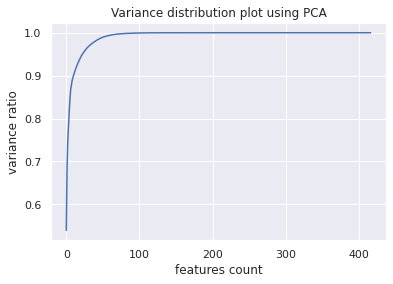

In [4]:
plt.plot(range(len(data1.columns)), np.cumsum(pca1.explained_variance_ratio_))
plt.xlabel("features count")
plt.ylabel("variance ratio")
plt.title("Variance distribution plot using PCA")
plt.show()

lets look at first 10 features

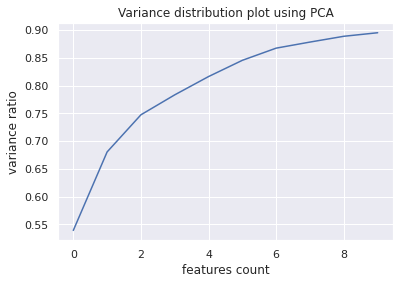

In [5]:
plt.plot(range(len(data1.columns))[:10], np.cumsum(pca1.explained_variance_ratio_)[:10])
plt.xlabel("features count")
plt.ylabel("variance ratio")
plt.title("Variance distribution plot using PCA")
plt.show()

So if we keep 3 dimensions (maximum number of dimensions that we are able to plot), we are preserving around 78 percent of total variance

In [6]:
# Note that we are whitening data
pca1 = PCA(3, whiten=True)

data1_pca = pca1.fit_transform(data1)

In [7]:
print(f"number of features before PCA: {len(data1.columns)}")
print(f"number of features after PCA: {data1_pca.shape[1]}")

number of features before PCA: 417
number of features after PCA: 3


plotting data

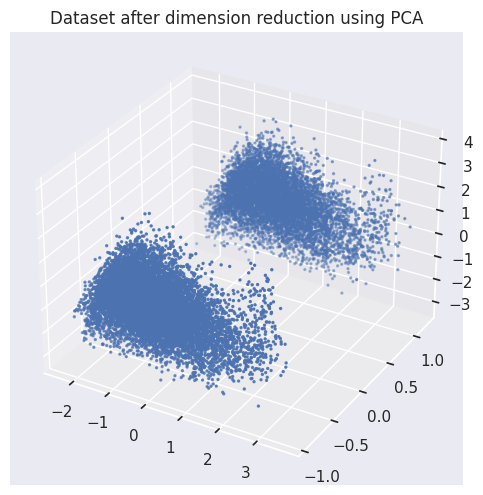

In [8]:
plot_3d(data1_pca, title="Dataset after dimension reduction using PCA")

### 2 Clusters

#### GMM

In [43]:
from sklearn.mixture import GaussianMixture

gmm1_2 = GaussianMixture(n_components=2)
y_pred_gmm1_2 = gmm1_2.fit_predict(data1_pca)

[INFO] plotting 2 classes.


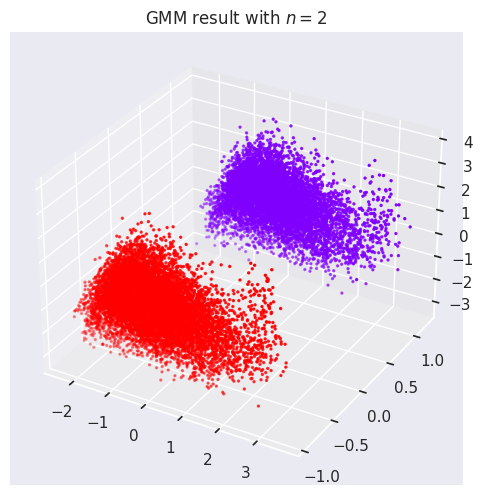

In [44]:
plot_3d(data1_pca, label=y_pred_gmm1_2, title="GMM result with $n = 2$")

As we can see, GMM has perfectly clustered dataset into 2 clusters

#### DBSCAN

In [11]:
from sklearn.cluster import DBSCAN

dbscan1_2 = DBSCAN(eps=1)
y_pred_dbscan1_2 = dbscan1_2.fit_predict(data1)

[INFO] plotting 3 classes.


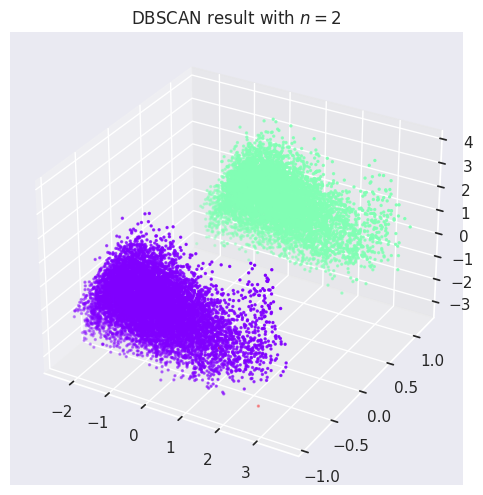

In [12]:
plot_3d(data1_pca, label=y_pred_dbscan1_2, title="DBSCAN result with $n = 2$")

Same result as GMM which is desirable

### 4 Clusters

Due to having 2 dense clusters HDSCAN would fail to find more than 2 clusters, so we are going to replace DBSCAN with KMeans in this section

#### GMM

In [13]:
gmm1_4 = GaussianMixture(n_components=4)
y_pred_gmm1_4 = gmm1_4.fit_predict(data1_pca)

[INFO] plotting 4 classes.


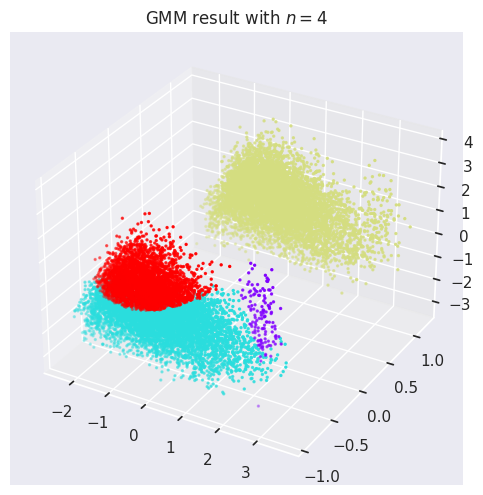

In [14]:
plot_3d(data1_pca, label=y_pred_gmm1_4, title="GMM result with $n = 4$")

This is what we were expecting algorithm to do (clustering each dense cluster into 2 cluster)

#### Kmeans

In [15]:
from sklearn.cluster import KMeans

km1_4 = KMeans(n_clusters=4)
y_pred_km1_4 = km1_4.fit_predict(data1_pca)

[INFO] plotting 4 classes.


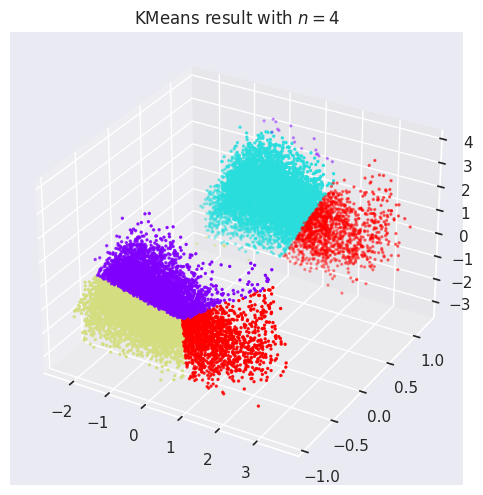

In [16]:
plot_3d(data1_pca, label=y_pred_km1_4, title="KMeans result with $n = 4$")

This is a bit unexpected but we have to note that KMeans starting points (initial center points) are chosen randomly, so if we run this algorithm over again we might get the same result as GMM

### 10 Clusters

#### GMM

In [17]:
gmm1_10 = GaussianMixture(n_components=10)
y_pred_gmm1_10 = gmm1_10.fit_predict(data1_pca)

[INFO] plotting 10 classes.


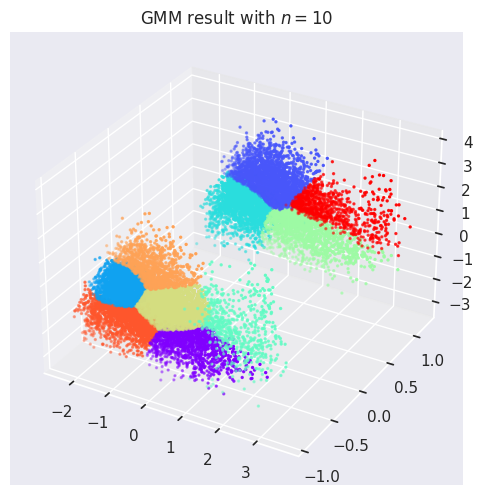

In [18]:
plot_3d(data1_pca, label=y_pred_gmm1_10, title="GMM result with $n = 10$")

#### Kmeans

In [19]:
km1_10 = KMeans(n_clusters=10)
y_pred_km1_10 = km1_10.fit_predict(data1_pca)

[INFO] plotting 10 classes.


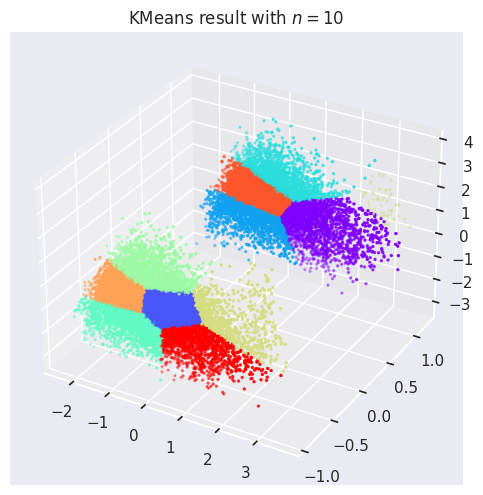

In [20]:
plot_3d(data1_pca, label=y_pred_km1_10, title="KMeans result with $n = 10$")

for 10 clusters, performance of KMeans and GMM don't differ much

### p clusters

$p$ is the number of participants

In [21]:
p = data1_pca.shape[0]//160

#### GMM

In [22]:
gmm1_p = GaussianMixture(n_components=p)
y_pred_gmm1_p = gmm1_p.fit_predict(data1_pca)

[INFO] plotting 104 classes.


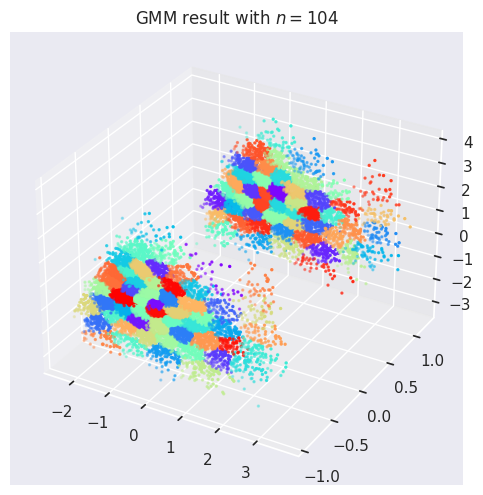

In [23]:
plot_3d(data1_pca, label=y_pred_gmm1_p, title=f"GMM result with $n = {p}$")

KMeans

In [24]:
km1_p = KMeans(n_clusters=p)
y_pred_km1_p = km1_p.fit_predict(data1_pca)

[INFO] plotting 104 classes.


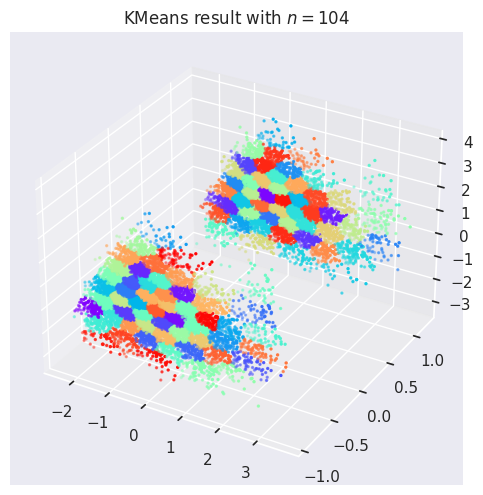

In [25]:
plot_3d(data1_pca, label=y_pred_km1_p, title=f"KMeans result with $n = {p}$")

There is nothing special in this part results and everything is as expected (for both KMeans and GMM)

## Dataset 2

We repeat all of our operations for dataset2 

Plotting variance distribution among features

In [26]:
pca2 = PCA(len(data2.columns), whiten=True)
_ = pca2.fit_transform(data2)

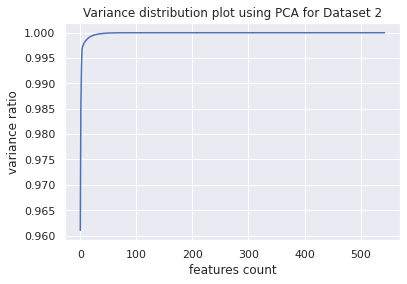

In [27]:
plt.plot(range(len(data2.columns)), np.cumsum(pca2.explained_variance_ratio_))
plt.xlabel("features count")
plt.ylabel("variance ratio")
plt.title("Variance distribution plot using PCA for Dataset 2")
plt.show()

Lets look at first 10 features

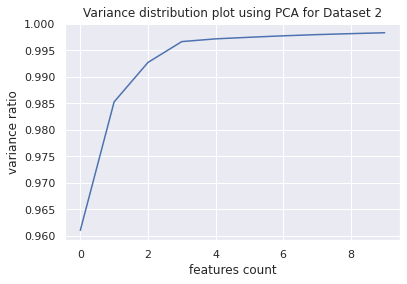

In [28]:
plt.plot(range(len(data2.columns))[:10], np.cumsum(pca2.explained_variance_ratio_)[:10])
plt.xlabel("features count")
plt.ylabel("variance ratio")
plt.title("Variance distribution plot using PCA for Dataset 2")
plt.show()

Woo, looks like we have almost 99.5 percent of total variance in just 3 features

In [29]:
pca2 = PCA(3, whiten=True)
data2_pca = pca2.fit_transform(data2)

plotting dataset 2 in 3 dimensions

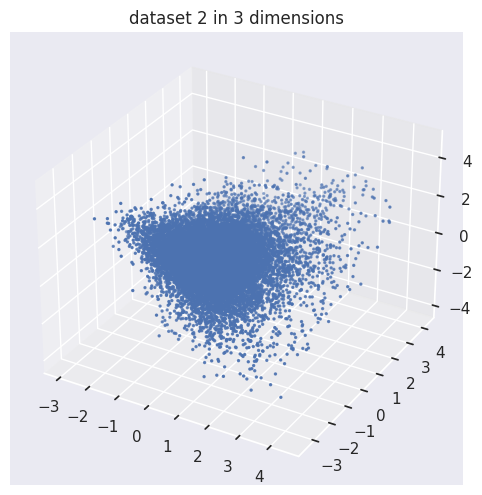

In [30]:
plot_3d(data2_pca, title="dataset 2 in 3 dimensions")

### 2 Clusters

#### GMM

In [31]:
gmm2_2 = GaussianMixture(n_components=2)
y_pred_gmm2_2 = gmm2_2.fit_predict(data2_pca)

[INFO] plotting 2 classes.


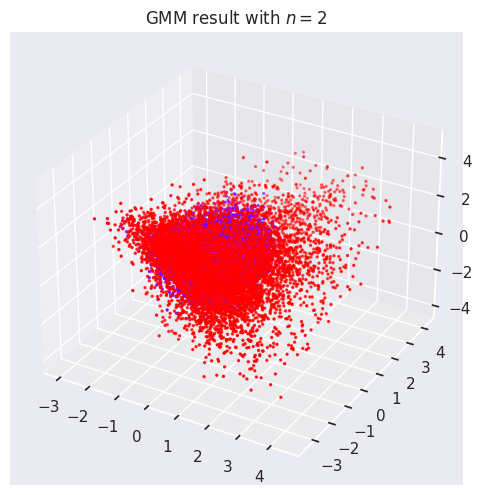

In [32]:
plot_3d(data2_pca, label=y_pred_gmm2_2, title=f"GMM result with $n = {2}$")

#### Kmeans

In [33]:
km2_2 = KMeans(n_clusters=2)
y_pred_km2_2 = km2_2.fit_predict(data2_pca)

[INFO] plotting 2 classes.


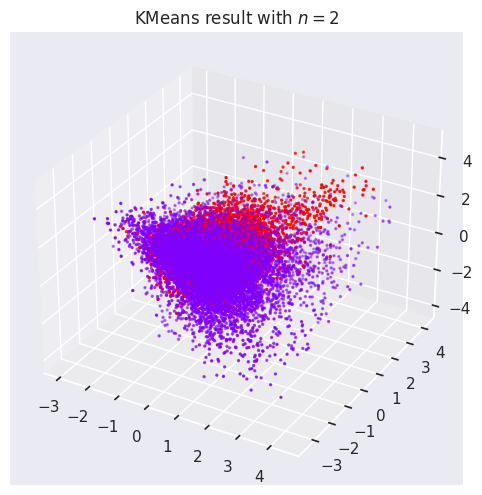

In [34]:
plot_3d(data2_pca, label=y_pred_km2_2, title=f"KMeans result with $n = {2}$")

### 4 Clusters

#### GMM

In [35]:
gmm2_4 = GaussianMixture(n_components=4)
y_pred_gmm2_4 = gmm2_4.fit_predict(data2_pca)

[INFO] plotting 4 classes.


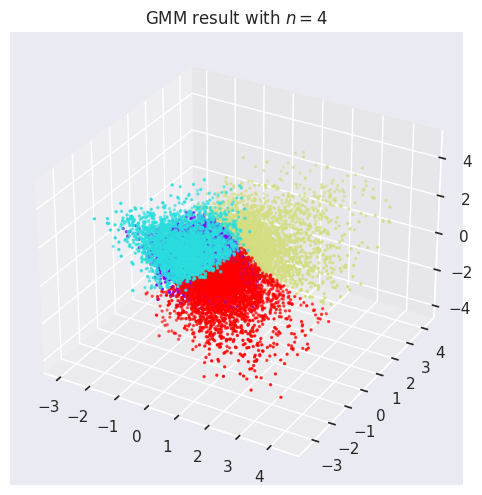

In [36]:
plot_3d(data2_pca, label=y_pred_gmm2_4, title=f"GMM result with $n = {4}$")

#### KMeans

In [37]:
km2_4 = KMeans(n_clusters=4)
y_pred_km2_4 = km2_4.fit_predict(data2_pca)

[INFO] plotting 4 classes.


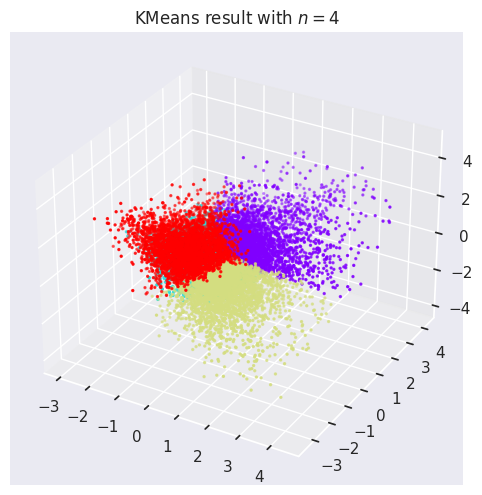

In [38]:
plot_3d(data2_pca, label=y_pred_km2_4, title=f"KMeans result with $n = {4}$")

### 10 Clusters

#### GMM

In [39]:
gmm2_10 = GaussianMixture(n_components=10)
y_pred_gmm2_10 = gmm2_10.fit_predict(data2_pca)

[INFO] plotting 10 classes.


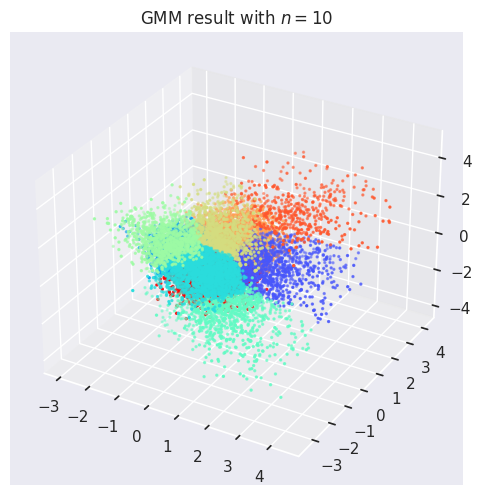

In [40]:
plot_3d(data2_pca, label=y_pred_gmm2_10, title=f"GMM result with $n = {10}$")

#### KMeans

In [41]:
km2_10 = KMeans(n_clusters=10)
y_pred_km2_10 = km2_10.fit_predict(data2_pca)

[INFO] plotting 10 classes.


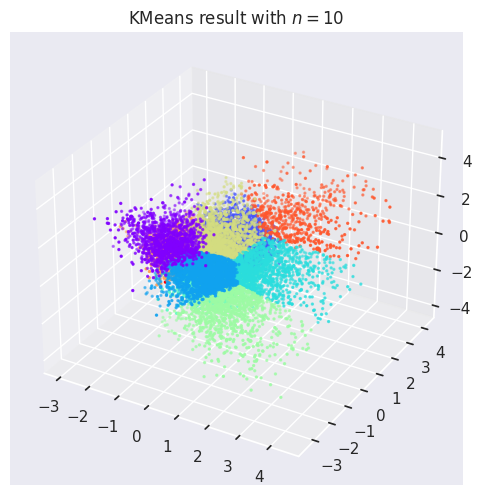

In [42]:
plot_3d(data2_pca, label=y_pred_km2_10, title=f"KMeans result with $n = {10}$")

Note that some 4 of 10 clusters are behind this view which we are seeing